# Biodiversity Project : Bird songs analysis

In [14]:
import os
import numpy as np
import math

import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt
import librosa, librosa.display, IPython.display as ipd
import json
from mutagen.mp3 import MP3
from statistics import mean, median
import noisereduce as nr
import sklearn
import contextlib
import wave
from scipy.io import wavfile
import pandas as pd
from sklearn.preprocessing import minmax_scale
%matplotlib inline


folder = "Bird_songs"  # chemin vers votre dossier

In [15]:


# --- Paramètres du filtre ---
fs = 44100          # fréquence d'échantillonnage
lowcut = 100       # limite basse du filtre
highcut = 12000     # limite haute du filtre
N = 1200            # ordre du filtre FIR (800–1600 conseillé)

# Conception du filtre FIR passe-bande
bp_filter = firwin(
    numtaps=N + 1,
    cutoff=[lowcut, highcut],
    pass_zero=False,
    fs=fs
)

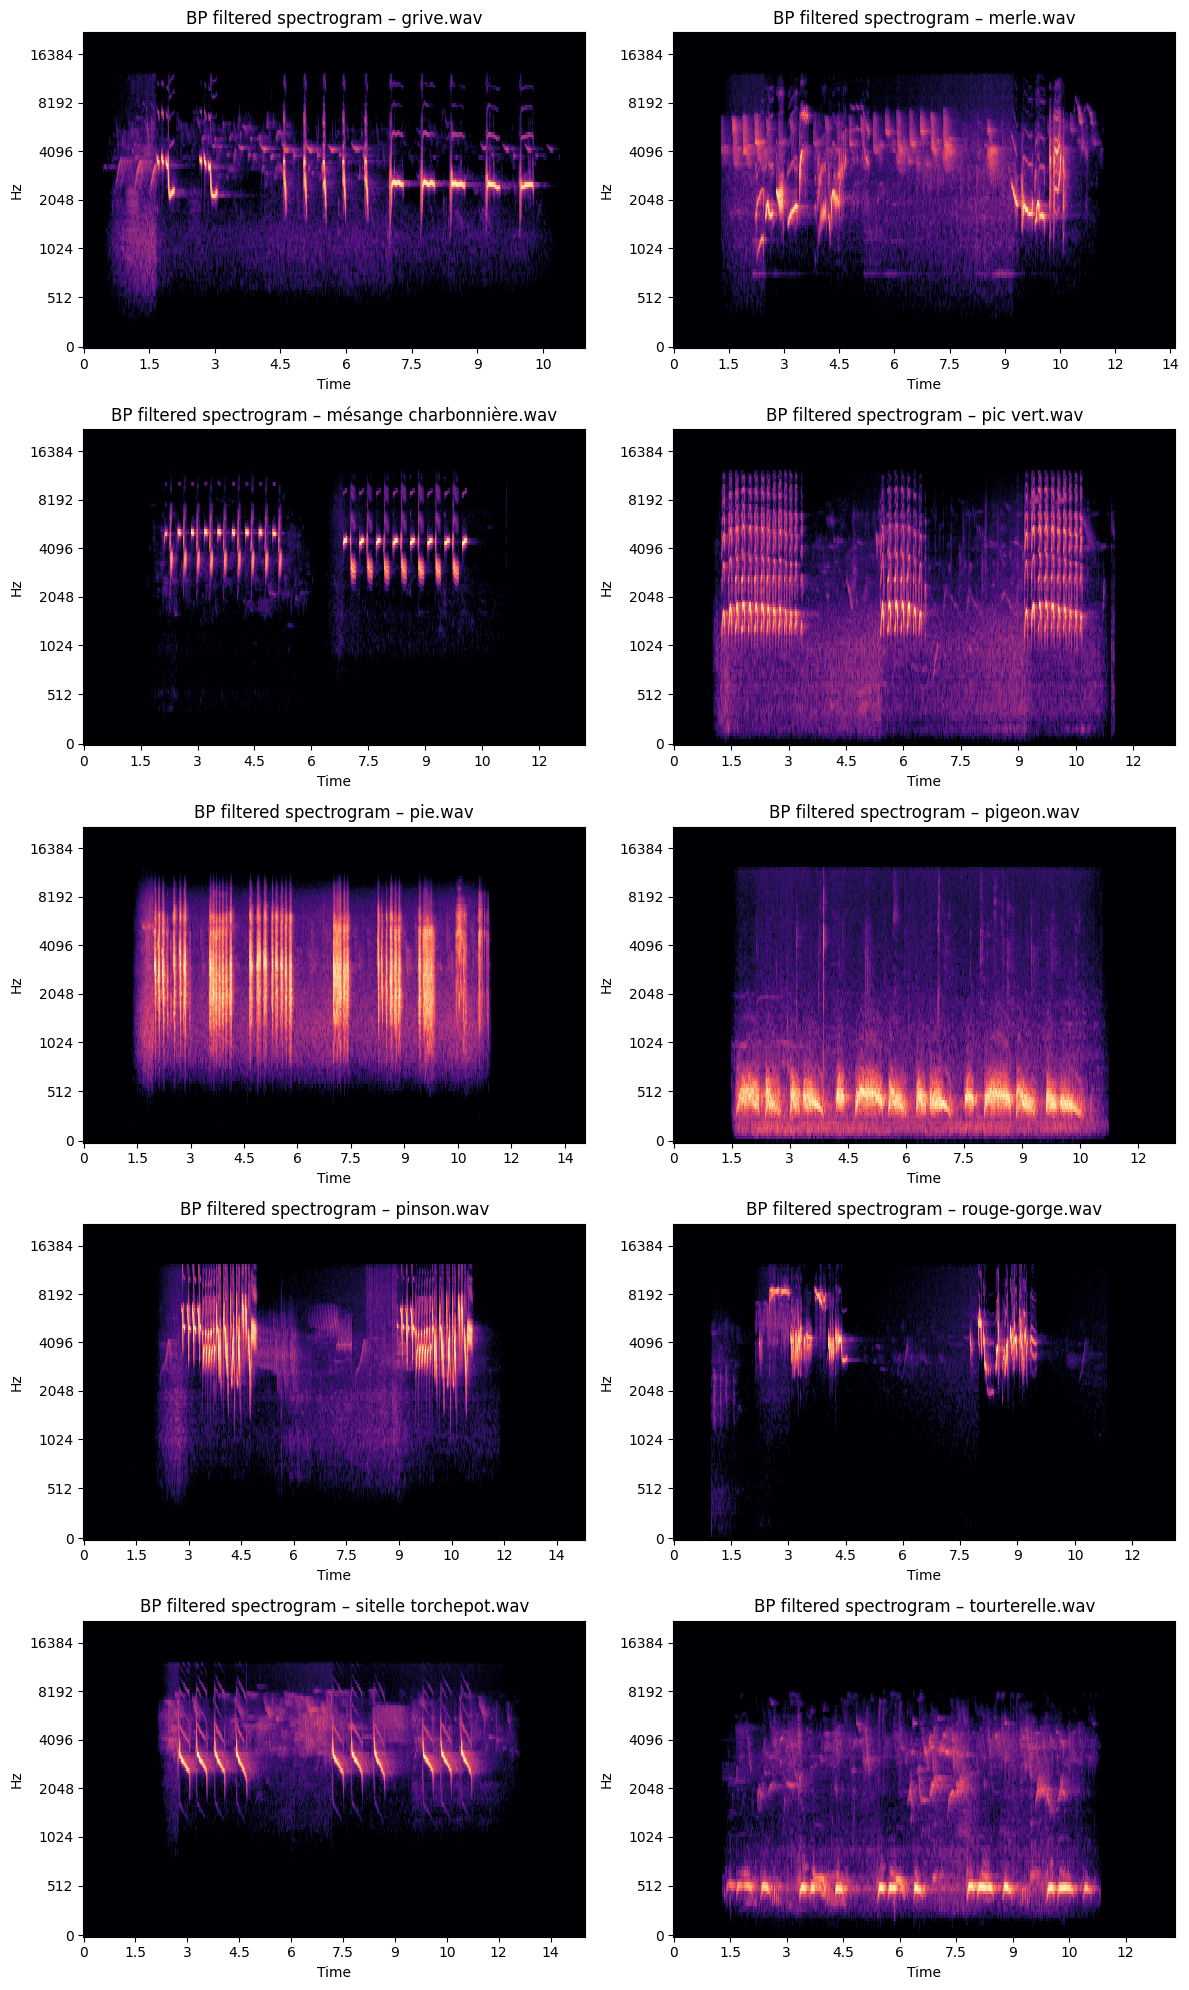

In [16]:
import os
import math
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from scipy.signal import lfilter

# --- Prepare file list ---
wav_files = [f for f in os.listdir(folder) if f.endswith(".wav")]
n_files = len(wav_files)

# Grille de subplots (modifiable)
cols = 2
rows = math.ceil(n_files / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()




output_folder = "BP_Filtered_Spectrograms"
os.makedirs(output_folder, exist_ok=True)

for idx, filename in enumerate(wav_files):
    filepath = os.path.join(folder, filename)

    # Load audio
    y, sr = librosa.load(filepath, sr=fs)

    # BP Filter
    y_filt = lfilter(bp_filter, 1.0, y)

    # Mel spectrogram
    S = librosa.feature.melspectrogram(y=y_filt, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)

    
    # Plots
    ax = axes[idx]
    img = librosa.display.specshow(
        S_dB, sr=sr, x_axis='time', y_axis='mel', cmap='magma', ax=ax
    )
    ax.set_title(f"BP filtered spectrogram – {filename}")

    # Individual save
    save_path = os.path.join(output_folder, filename.replace(".wav", ".png"))
    plt.savefig(save_path, dpi=200)

# If the grid has too much cases we delete them
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


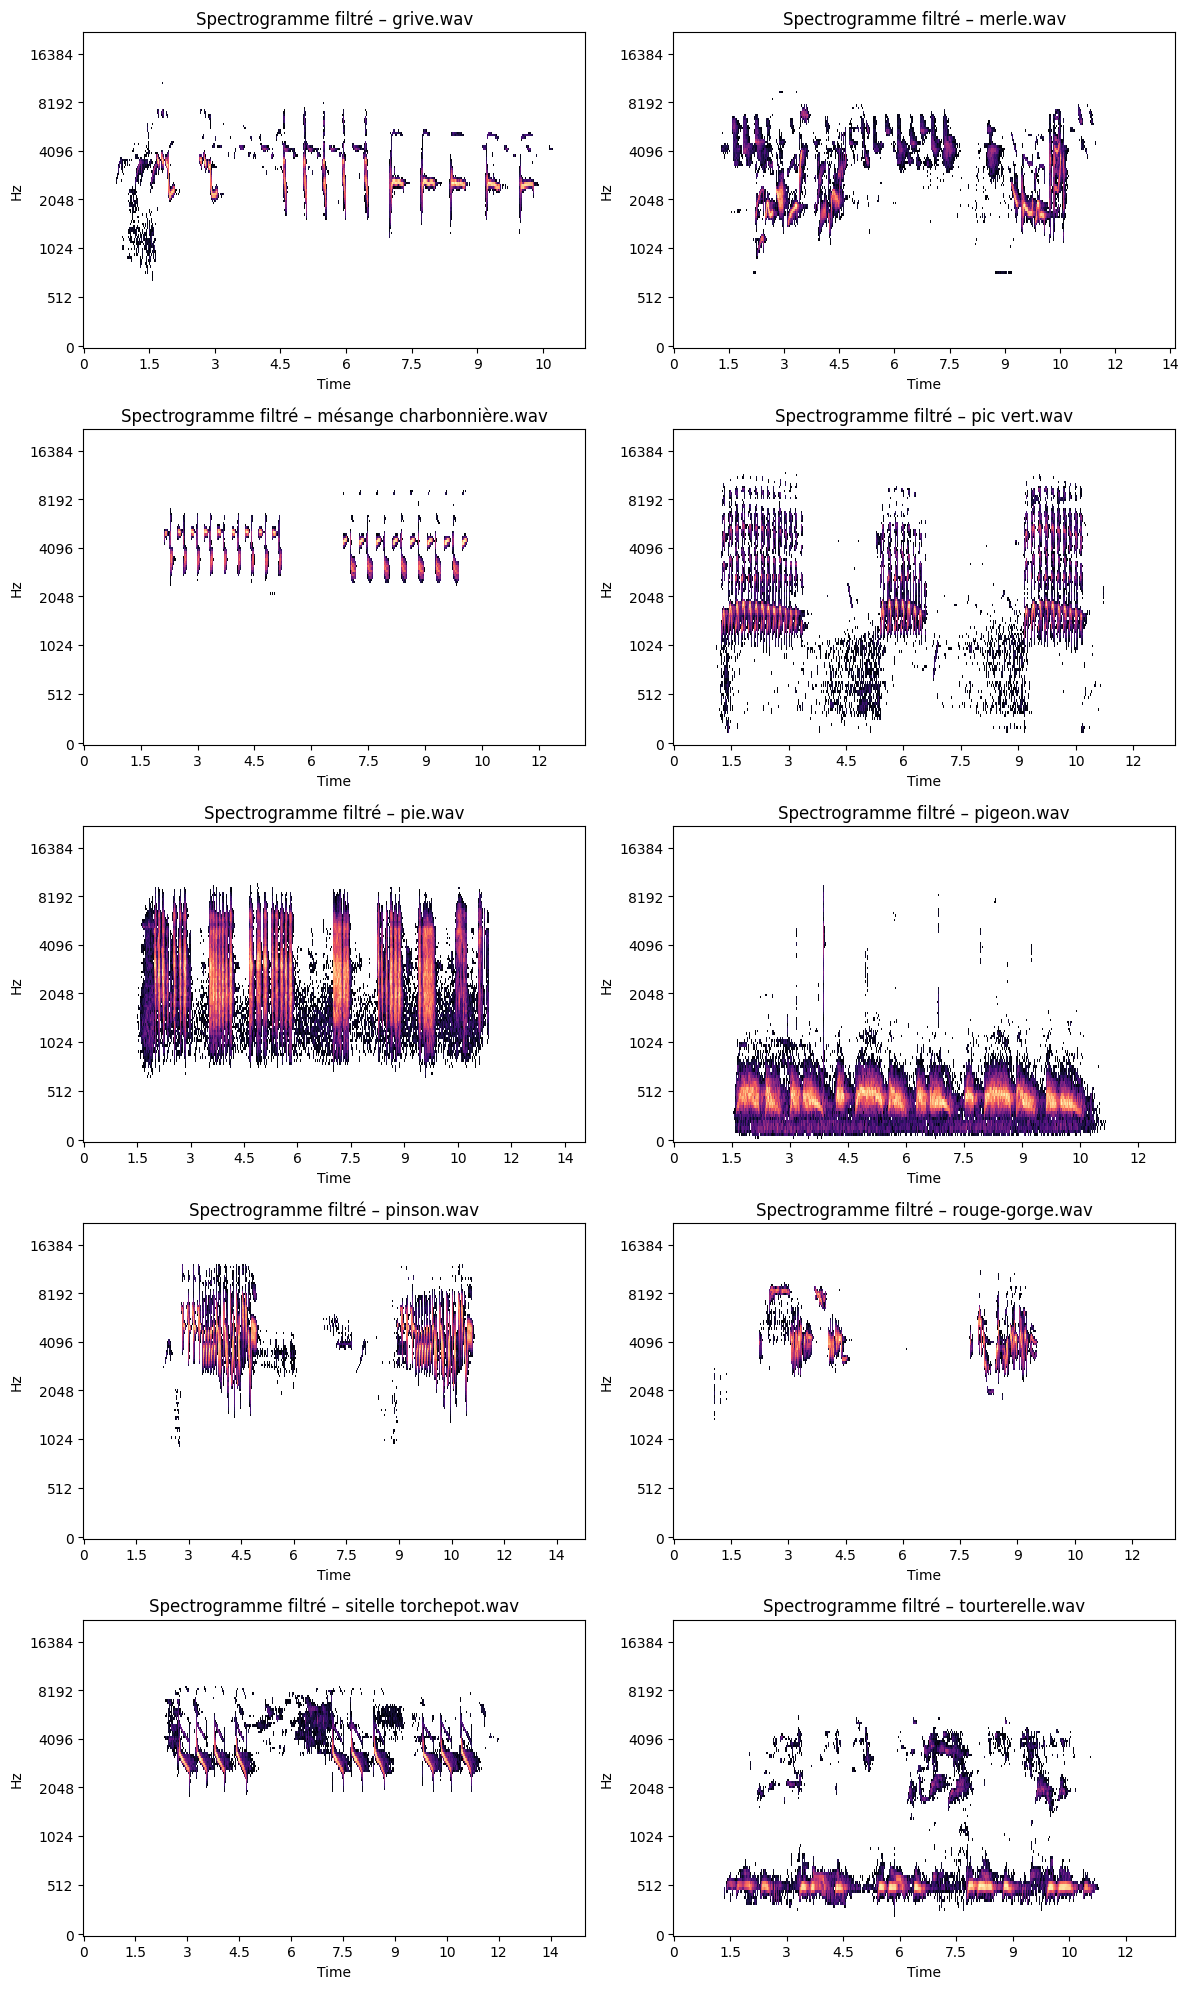

In [17]:
import os
import math
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from scipy.signal import lfilter

# --- Préparer la liste des fichiers wav ---
wav_files = [f for f in os.listdir(folder) if f.endswith(".wav")]
n_files = len(wav_files)

# Grille de subplots (modifiable)
cols = 2
rows = math.ceil(n_files / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()

output_folder = "BP_Filtered_Thresholded_Spectrograms"
os.makedirs(output_folder, exist_ok=True)

for idx, filename in enumerate(wav_files):
    filepath = os.path.join(folder, filename)

    # Charger audio
    y, sr = librosa.load(filepath, sr=fs)

    # Filtrage passe-bande
    y_filt = lfilter(bp_filter, 1.0, y)

    # Calcul du spectrogramme Mel
    S = librosa.feature.melspectrogram(y=y_filt, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Filtrage par seuil d'intensité
    threshold = -50
    S_filtered = np.where(S_dB > threshold, S_dB, np.nan)

    # Plot dans la bonne case
    ax = axes[idx]
    img = librosa.display.specshow(
        S_filtered, sr=sr, x_axis='time', y_axis='mel', cmap='magma', ax=ax
    )
    ax.set_title(f"Spectrogramme filtré – {filename}")

    # Sauvegarde individuelle
    save_path = os.path.join(output_folder, filename.replace(".wav", ".png"))
    plt.savefig(save_path, dpi=200)

# Si la grille a plus de cases que de fichiers, on les supprime
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


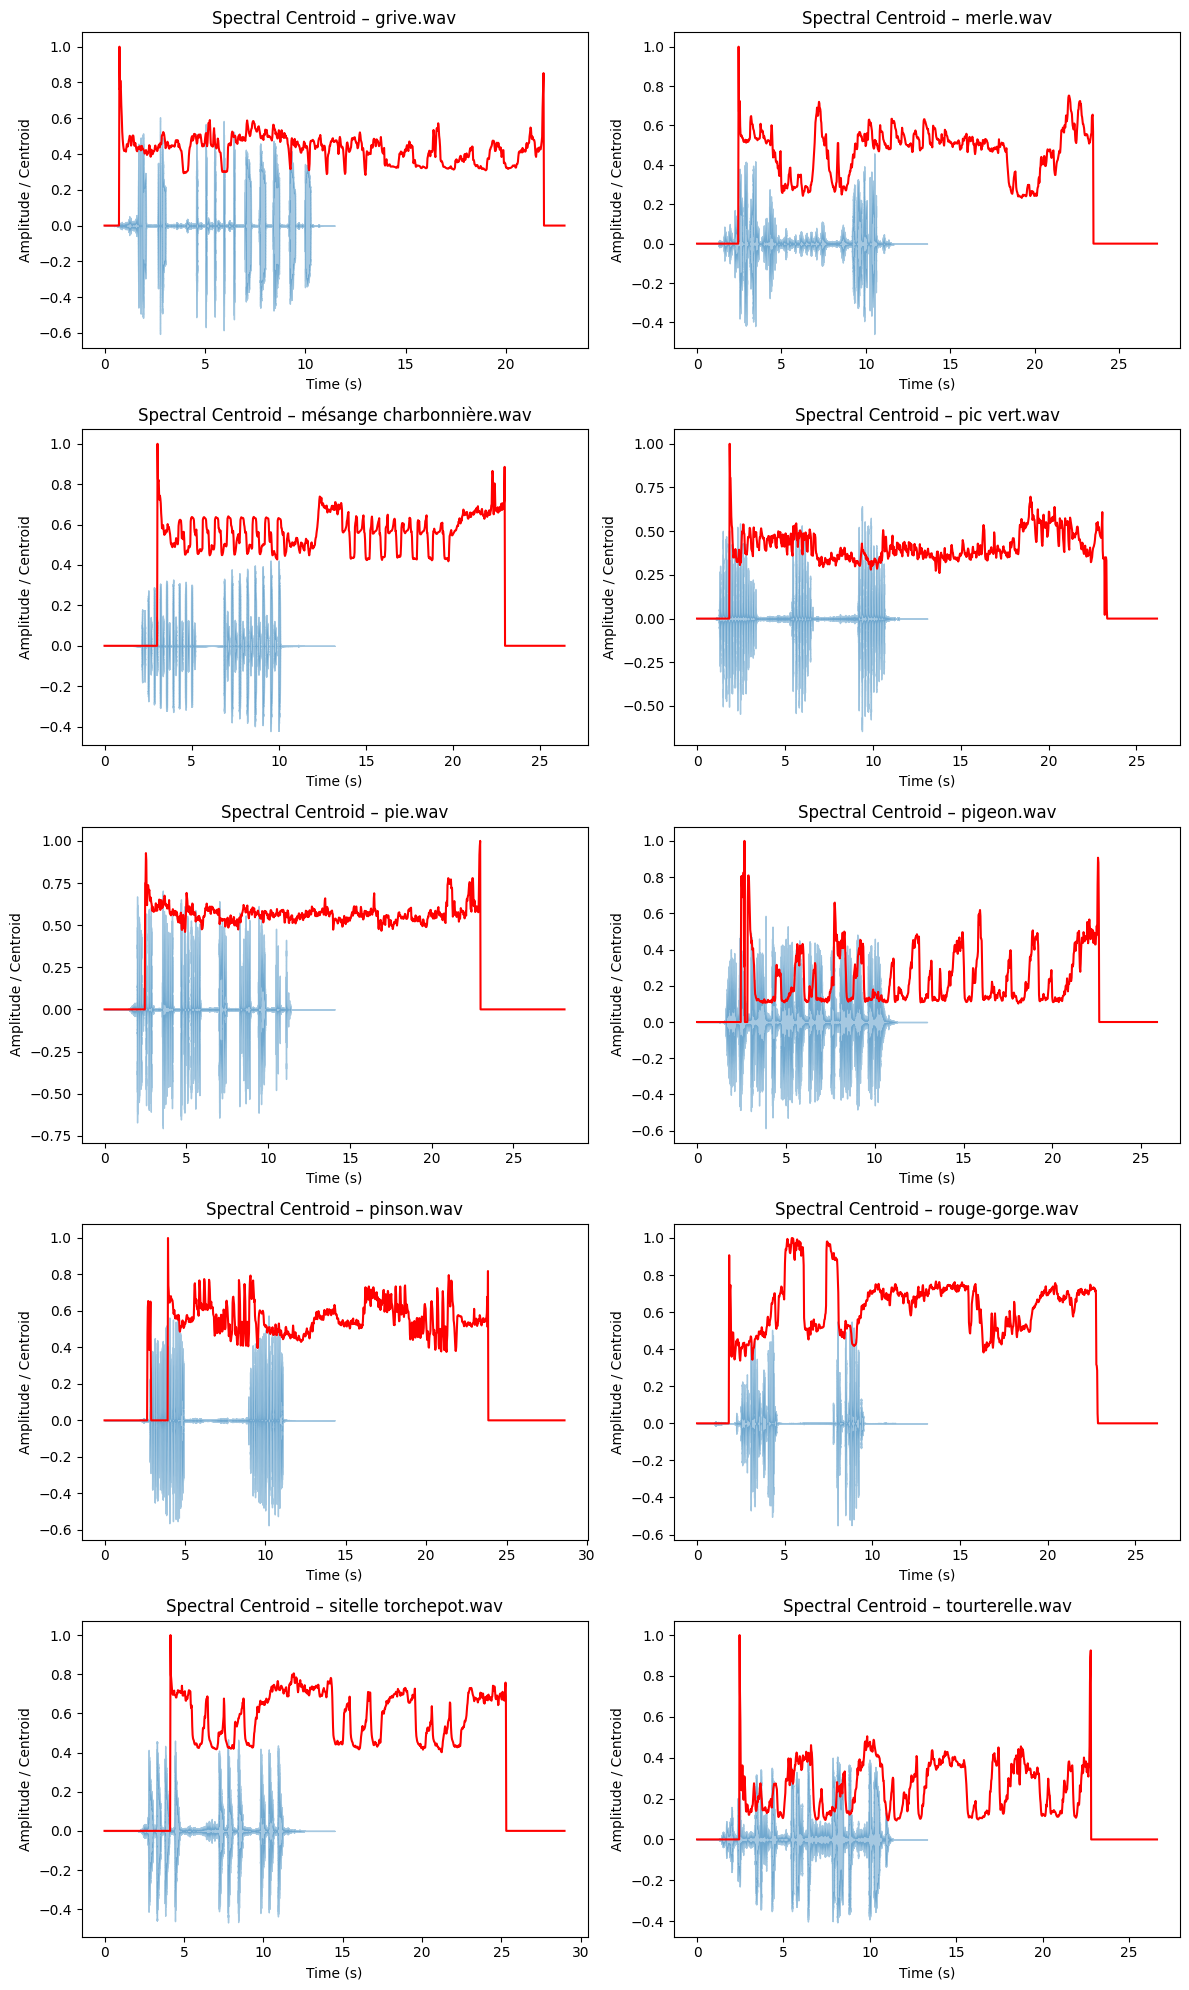

In [18]:


# --- Préparer la liste des fichiers wav ---
wav_files = [f for f in os.listdir(folder) if f.endswith(".wav")]
n_files = len(wav_files)

# --- Choisir la taille de la grille ---
cols = 2                     # nombre de colonnes (tu peux changer)
rows = math.ceil(n_files / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()        # pour accéder facilement aux subplots

for idx, filename in enumerate(wav_files):
    filepath = os.path.join(folder, filename)

    # Charger audio
    y, sr = librosa.load(filepath, sr=fs)

    # Filtre
    y_filt = lfilter(bp_filter, 1.0, y)

    # Centroides spectraux
    spectral_centroids = librosa.feature.spectral_centroid(y=y_filt, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)

    # Normalisation
    def normalize(x, axis=0):
        return minmax_scale(x, axis=axis)

    # --- Tracé dans la case correspondante ---
    ax = axes[idx]
    librosa.display.waveshow(y=y, sr=sr, alpha=0.4, ax=ax)
    ax.plot(t, normalize(spectral_centroids), color='r')
    ax.set_title(f"Spectral Centroid – {filename}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude / Centroid")

# Si la grille a plus de cases que de fichiers, on les masque
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


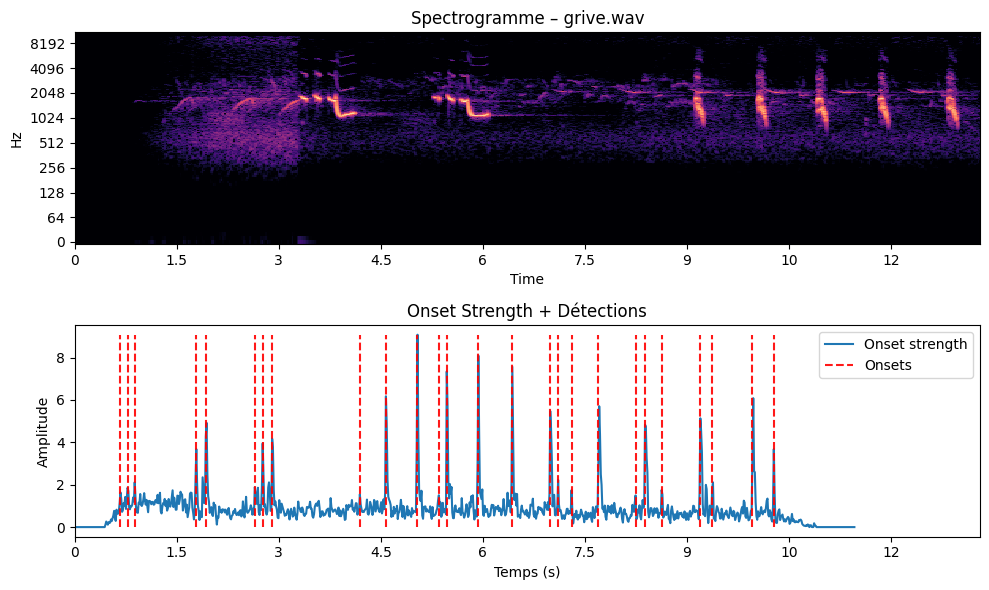

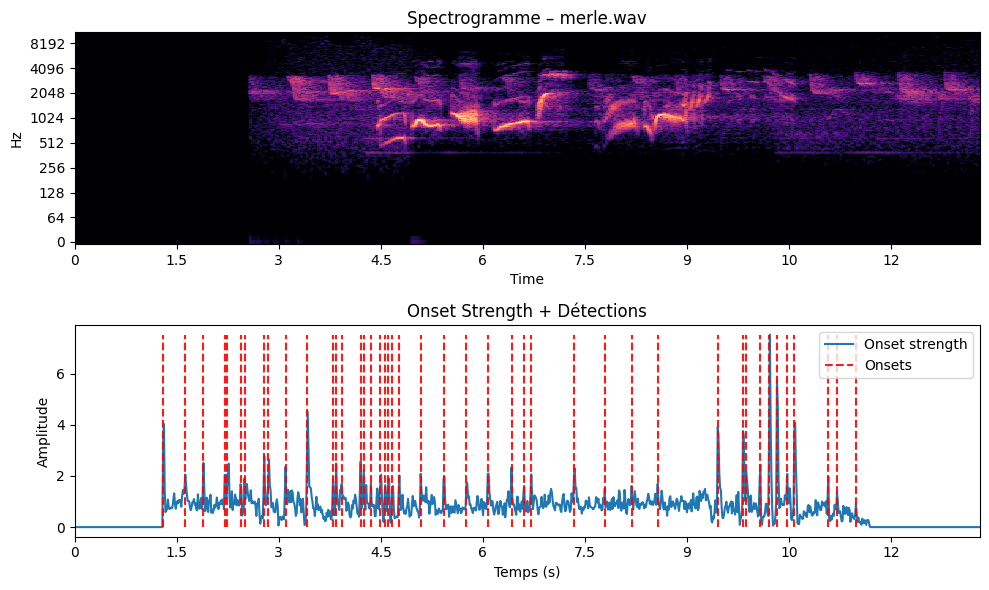

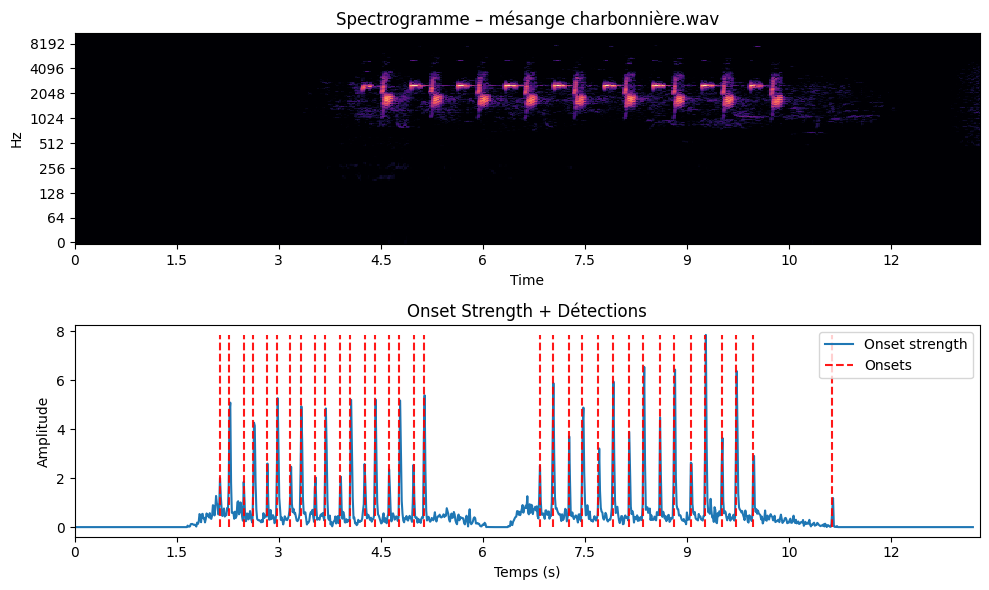

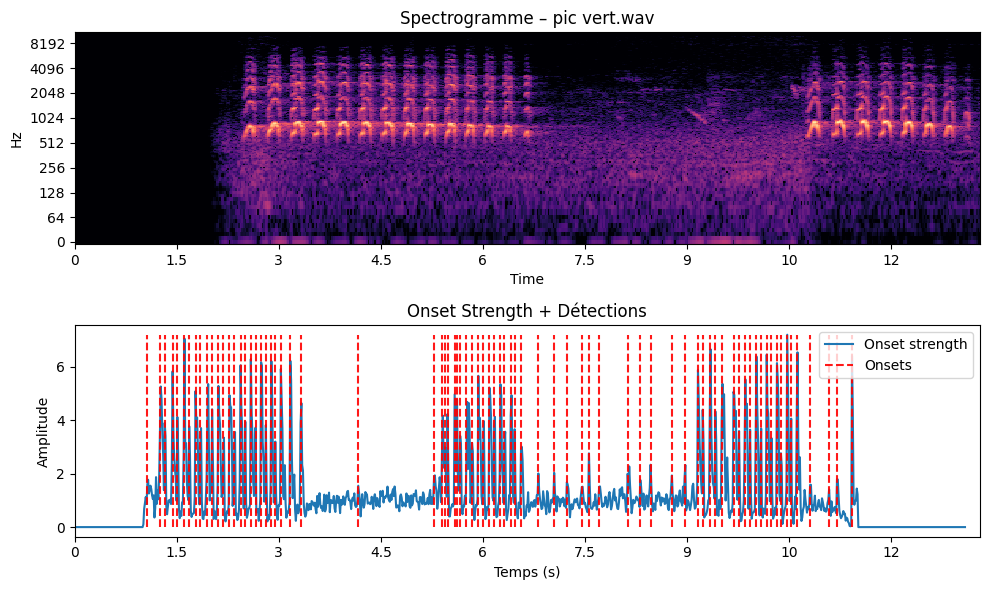

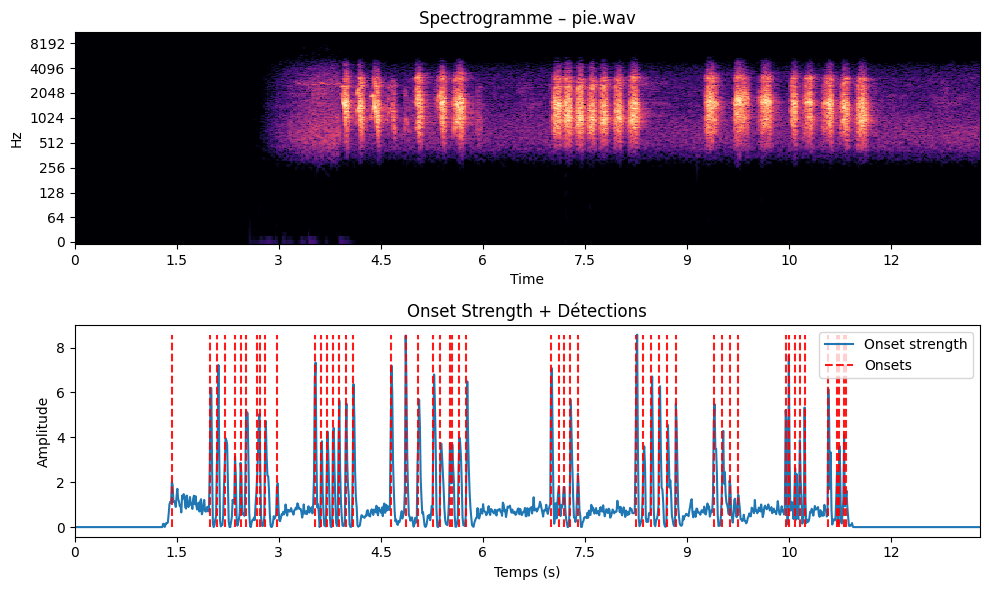

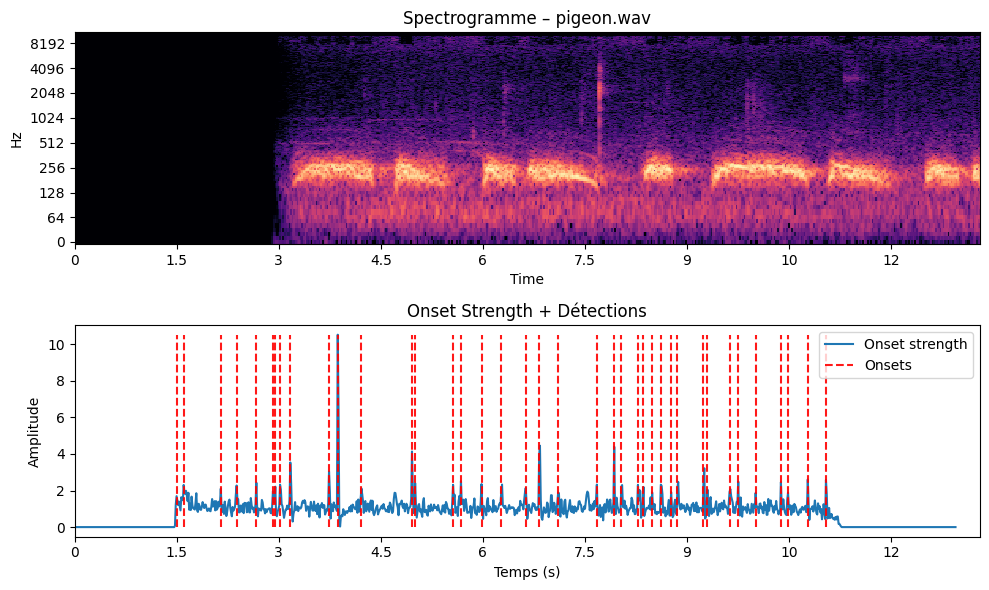

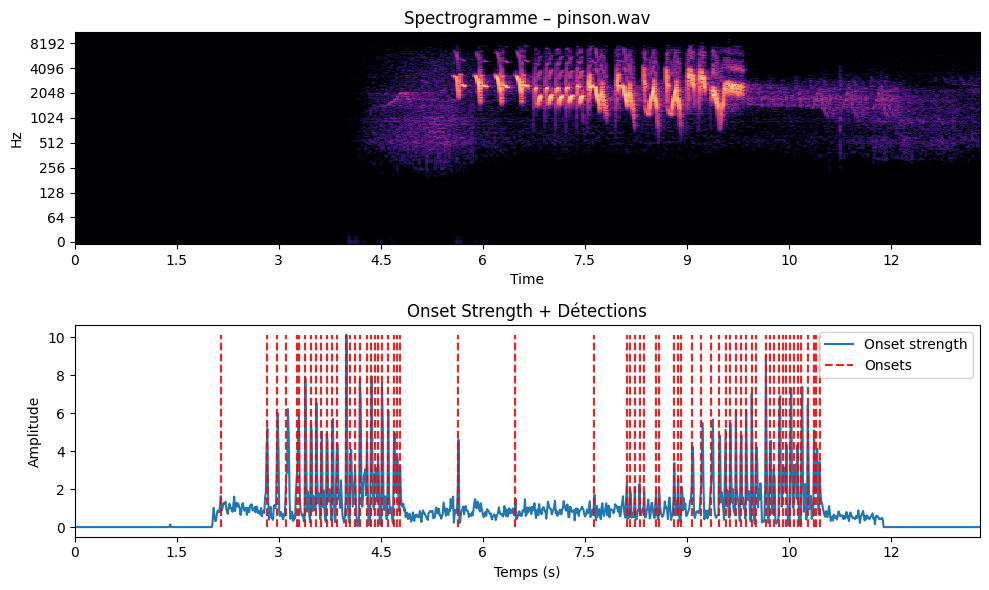

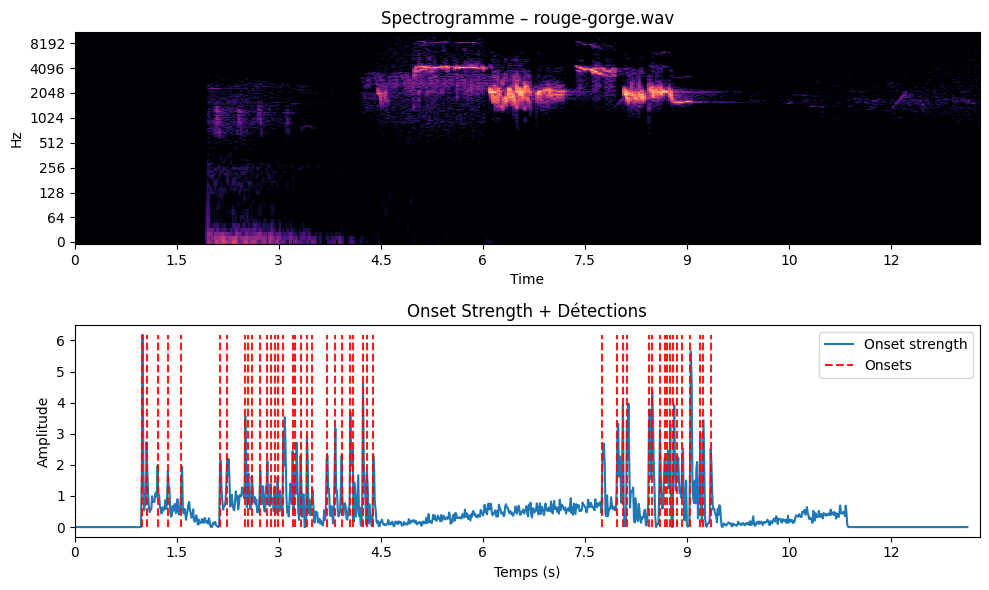

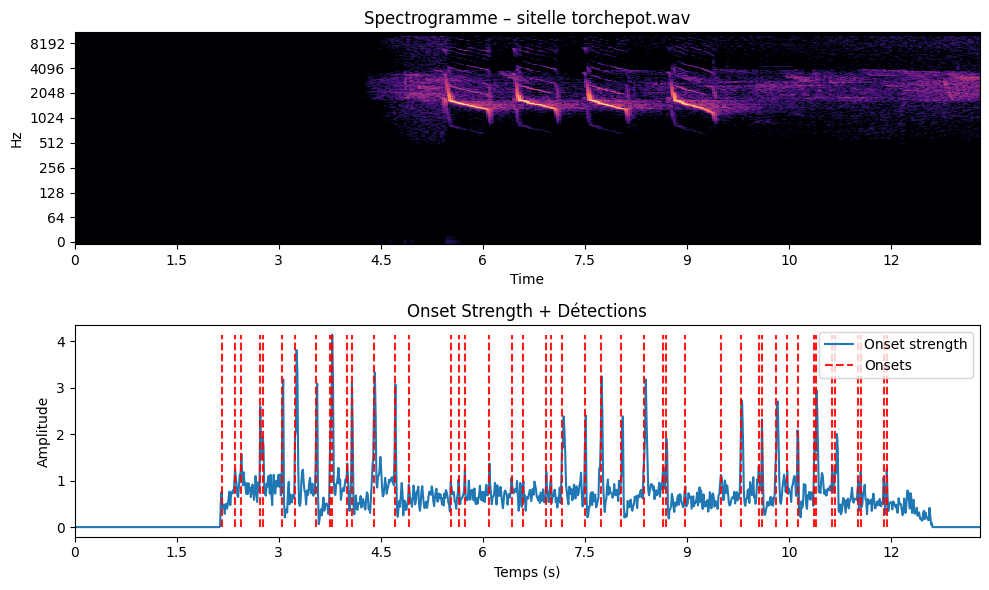

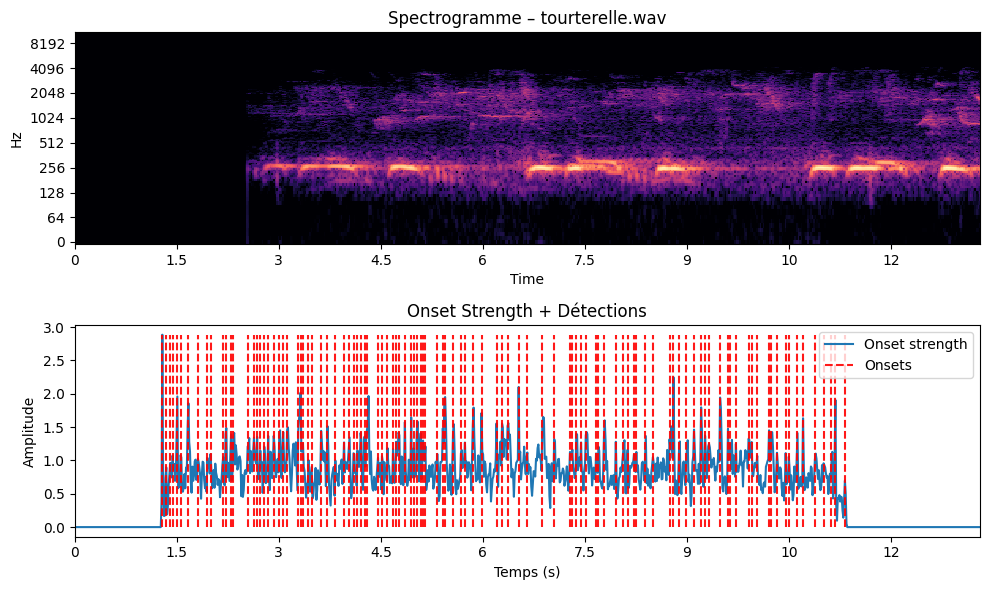

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

for filename in os.listdir(folder):
    if filename.endswith(".wav"):
        filepath = os.path.join(folder, filename)

        # --- Charger audio ---
        y, sr = librosa.load(filepath, sr=fs)


hop_length = 512

# décalage dû à la STFT
delay = (n_fft // 2) / sr  # secondes

# onset envelope
o_env = librosa.onset.onset_strength(
    y=y_filt, sr=sr,
    hop_length=hop_length,
    n_fft=n_fft
)

# temps corrigés
times = librosa.frames_to_time(
    np.arange(len(o_env)),
    sr=sr,
    hop_length=hop_length
) + delay

# spectrogramme
D = np.abs(librosa.stft(y_filt, n_fft=n_fft, hop_length=hop_length))

# --- PLOT ---
fig = plt.figure(figsize=(10, 6))

# spectrogramme
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(
    librosa.amplitude_to_db(D, ref=np.max),
    x_axis='time', y_axis='log',
    hop_length=hop_length,
    ax=ax1
)
ax1.set_title(f"Spectrogramme – {filename}")

# onset strength
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
ax2.plot(times, o_env, label="Onset strength")
ax2.vlines(times[onset_frames], 0, o_env.max(),
           color='r', linestyle='--', alpha=0.9)
ax2.set_title("Onset Strength + Détections")
ax2.set_xlabel("Temps (s)")
ax2.set_ylabel("Amplitude")
ax2.legend()

plt.tight_layout()
plt.show()

